<a href="https://colab.research.google.com/github/ricardoadley/dados-pesquisa-metodologia/blob/main/an%C3%A1lise_metodologia_cientifica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- O contato com jogos digitais influencia a escolha pelo curso de ciência da
computação
- O uso excessivo de jogos digitais durante a graduação prejudica o
desempenho acadêmico, bem como a saúde mental, a qualidade do sono e o
convívio social

In [1]:
# imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np 

In [2]:
# Carregando o dataframe

df = pd.read_csv('https://docs.google.com/uc?export=download&id=1WbWTXoPW6fVd7gVAQrN_uq0NXPGw4xpa')
df

,Carimbo de data/hora,"Para confirmar sua participação, precisamos que concorde com o seguinte termo de consentimento: \nConcordo em participar voluntariamente do presente estudo, consciente de que todas as minhas respostas permanecerão em modo anônimo.\n","Sobre o consumo de jogos digitais, como você se define?",Jogar influenciou na sua decisão de entrar no curso?,Quantas horas por semana você joga?,Quantas horas semanais você dedica à graduação (Excluindo os horários em sala de aula)?,Jogar atrapalhou/atrapalha o seu desempenho acadêmico?,Quanto você considera o ambiente/comunidade dos jogos digitais nocivo ao bem estar e saúde mental?\n,Já foi alvo de comportamento nocivo no ambiente de jogos online?,Caso a resposta anterior tenha sido SIM\n\nQuanto esse comportamento nocivo no ambiente de jogos digitais afetou o seu bem estar ?\n\nSendo 1 para NÃO AFETOU e 5 para AFETOU MUITO,Com que frequência o consumo de jogos digitais afeta o seu sono?
0,2022/11/22 6:44:52 PM GMT-3,Concordo e desejo continuar,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 5 e 10 horas semanais,Entre 11 e 20 horas semanais,Não concordo nem discordo,Moderadamente nocivo,Sim,4.0,Neutro
1,2022/11/22 6:45:16 PM GMT-3,Concordo e desejo continuar,Jogava com frequência antes de ingressar no cu...,Concordo,Mais de 30 horas semanais,Entre 5 e 10 horas semanais,Não concordo nem discordo,Um pouco nocivo,Sim,2.0,Raramente/Nunca
2,2022/11/22 6:45:24 PM GMT-3,Concordo e desejo continuar,"Jogava com frequência, mas parei/reduzi a freq...",Discordo,Entre 0 e 4 horas semanais,Entre 11 e 20 horas semanais,Discordo,Um pouco nocivo,Sim,3.0,Neutro
3,2022/11/22 6:45:33 PM GMT-3,Concordo e desejo continuar,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 21 e 30 horas semanais,Entre 5 e 10 horas semanais,Discordo,Um pouco nocivo,Sim,4.0,Frequentemente
4,2022/11/22 6:52:30 PM GMT-3,Concordo e desejo continuar,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 0 e 4 horas semanais,Entre 5 e 10 horas semanais,Discordo totalmente,Muito nocivo,Sim,1.0,Raramente/Nunca
...,...,...,...,...,...,...,...,...,...,...,...
109,2022/11/29 3:21:00 PM GMT-3,Concordo e desejo continuar,Não jogava antes de ingressar no curso e conti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2022/11/29 11:08:07 PM GMT-3,Concordo e desejo continuar,Jogava com frequência antes de ingressar no cu...,Discordo totalmente,Entre 0 e 4 horas semanais,Entre 21 e 30 horas semanais,Discordo,Um pouco nocivo,Não,1.0,Ocasionalmente
111,2022/11/30 10:54:28 AM GMT-3,Concordo e desejo continuar,"Jogava com frequência, mas parei/reduzi a freq...",Não concordo nem discordo,Entre 5 e 10 horas semanais,Entre 11 e 20 horas semanais,Concordo,Muito nocivo,Sim,4.0,Ocasionalmente
112,2022/11/30 9:47:47 PM GMT-3,Concordo e desejo continuar,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 0 e 4 horas semanais,Entre 11 e 20 horas semanais,Não concordo nem discordo,Um pouco nocivo,Sim,3.0,Ocasionalmente


In [3]:
# preparando os dados para análise

### removendo as colunas de data e hora e a coluna do termo de consentimento que não são importantes para a análise
df = df.drop(df.columns[[0,1]], axis = 1)

### renomeando colunas para melhor entendimento
df.rename(columns={df.columns[0]: 'perfil', df.columns[1]: 'influenciou para entrar no curso', df.columns[2]: 'horas semanais em jogos', df.columns[3]: 'horas semanais na graduacao', df.columns[4]: 'atrapalha desempenho acadêmico',df.columns[5]: 'quão nocivos a saude mental', df.columns[6]: 'foi alvo de comportamento nocivo', df.columns[7]: 'quão afetado pelo comportamento nocivo', df.columns[8]: 'frequencia que afeta sono'}, inplace=True)

### removendo colunas com valores nulos (correspondem as respostas de quem não joga jogos digitais)
df = df[df.perfil != 'Não jogava antes de ingressar no curso e continuo sem jogar']

### Transformando a coluna "quao afetado pelo comportamento nocivo" de string para float"
df['quão afetado pelo comportamento nocivo'] = df['quão afetado pelo comportamento nocivo'].astype(float)
df


,perfil,influenciou para entrar no curso,horas semanais em jogos,horas semanais na graduacao,atrapalha desempenho acadêmico,quão nocivos a saude mental,foi alvo de comportamento nocivo,quão afetado pelo comportamento nocivo,frequencia que afeta sono
0,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 5 e 10 horas semanais,Entre 11 e 20 horas semanais,Não concordo nem discordo,Moderadamente nocivo,Sim,4.0,Neutro
1,Jogava com frequência antes de ingressar no cu...,Concordo,Mais de 30 horas semanais,Entre 5 e 10 horas semanais,Não concordo nem discordo,Um pouco nocivo,Sim,2.0,Raramente/Nunca
2,"Jogava com frequência, mas parei/reduzi a freq...",Discordo,Entre 0 e 4 horas semanais,Entre 11 e 20 horas semanais,Discordo,Um pouco nocivo,Sim,3.0,Neutro
3,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 21 e 30 horas semanais,Entre 5 e 10 horas semanais,Discordo,Um pouco nocivo,Sim,4.0,Frequentemente
4,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 0 e 4 horas semanais,Entre 5 e 10 horas semanais,Discordo totalmente,Muito nocivo,Sim,1.0,Raramente/Nunca
...,...,...,...,...,...,...,...,...,...
108,Jogava com frequência antes de ingressar no cu...,Não concordo nem discordo,Entre 11 e 20 horas semanais,Entre 21 e 30 horas semanais,Discordo,Moderadamente nocivo,Sim,1.0,Neutro
110,Jogava com frequência antes de ingressar no cu...,Discordo totalmente,Entre 0 e 4 horas semanais,Entre 21 e 30 horas semanais,Discordo,Um pouco nocivo,Não,1.0,Ocasionalmente
111,"Jogava com frequência, mas parei/reduzi a freq...",Não concordo nem discordo,Entre 5 e 10 horas semanais,Entre 11 e 20 horas semanais,Concordo,Muito nocivo,Sim,4.0,Ocasionalmente
112,"Jogava com frequência, mas parei/reduzi a freq...",Concordo,Entre 0 e 4 horas semanais,Entre 11 e 20 horas semanais,Não concordo nem discordo,Um pouco nocivo,Sim,3.0,Ocasionalmente


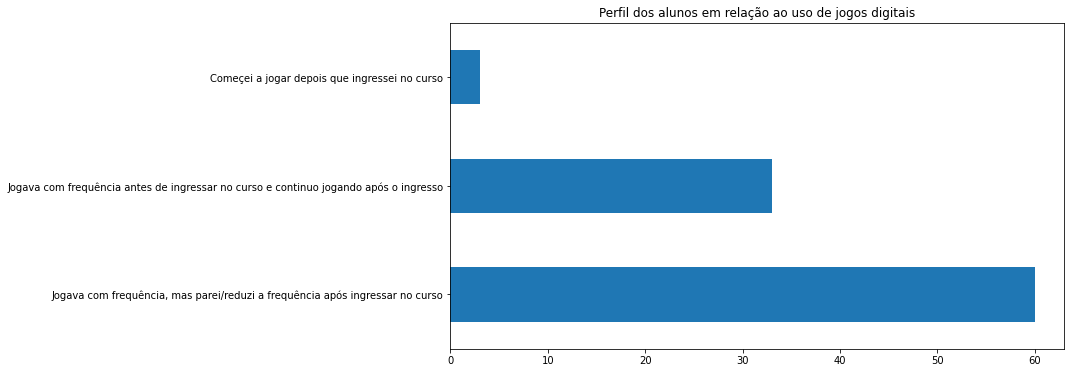

In [4]:
# Análises e visualizações sobre o perfil dos alunos

df['perfil'].value_counts().plot(kind='barh', figsize= (11,6), title='Perfil dos alunos em relação ao uso de jogos digitais')

# a maioria expressiva tem o habito de jogar jogos digitais


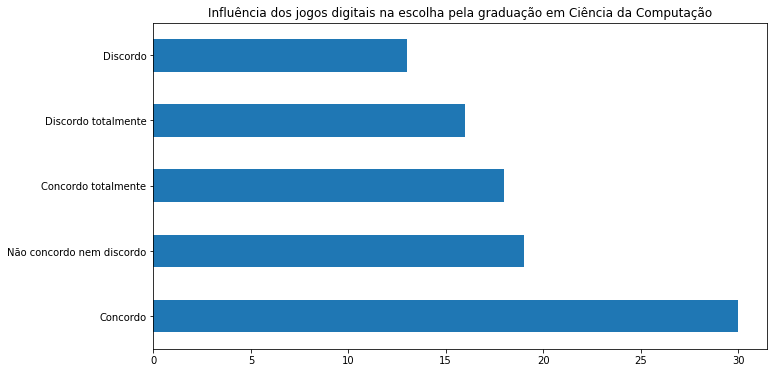

In [5]:
# Análises e visualizações sobre o perfil dos alunos
df['influenciou para entrar no curso'].value_counts().plot(kind='barh', figsize= (11,6), title='Influência dos jogos digitais na escolha pela graduação em Ciência da Computação')

In [6]:
df['influenciou para entrar no curso'].value_counts()

Concordo                     30
Não concordo nem discordo    19
Concordo totalmente          18
Discordo totalmente          16
Discordo                     13
Name: influenciou para entrar no curso, dtype: int64

Text(0, 0.5, 'Quantidade de horas semanais')

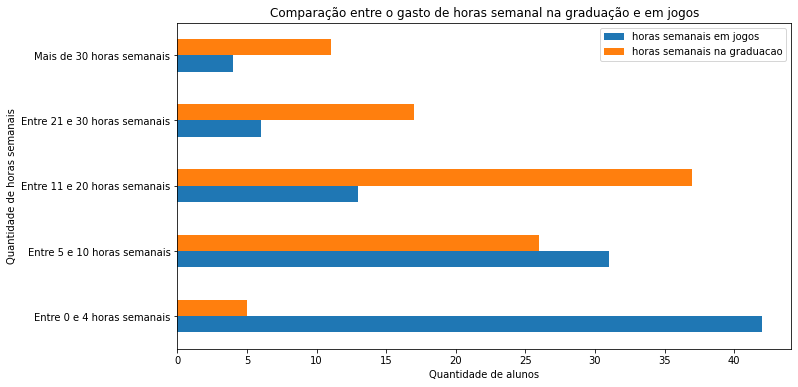

In [7]:
# Análises e visualizações sobre o perfil dos alunos

df1 = df['horas semanais em jogos'].value_counts()
df2 = df['horas semanais na graduacao'].value_counts()

d = pd.concat([df1, df2], axis=1)
d = d.plot(kind='barh', figsize= (11,6), title='Comparação entre o gasto de horas semanal na graduação e em jogos')

d.set_xlabel("Quantidade de alunos")
d.set_ylabel("Quantidade de horas semanais")


# os alunos parecem gastar mais tempo com a graduação do que com jogos


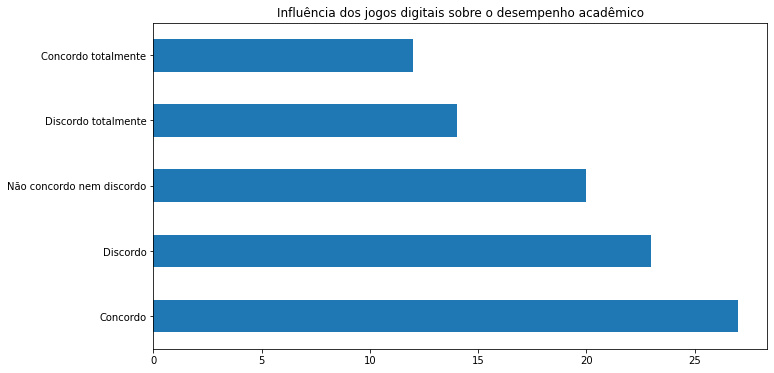

In [8]:
# Analise da relação entre jogos, desempenho na graduação e bem estar - atrapalha desempenho acadêmico
df['atrapalha desempenho acadêmico'].value_counts().plot(kind='barh', figsize= (11,6), title='Influência dos jogos digitais sobre o desempenho acadêmico')


In [9]:
df['atrapalha desempenho acadêmico'].value_counts()

Concordo                     27
Discordo                     23
Não concordo nem discordo    20
Discordo totalmente          14
Concordo totalmente          12
Name: atrapalha desempenho acadêmico, dtype: int64

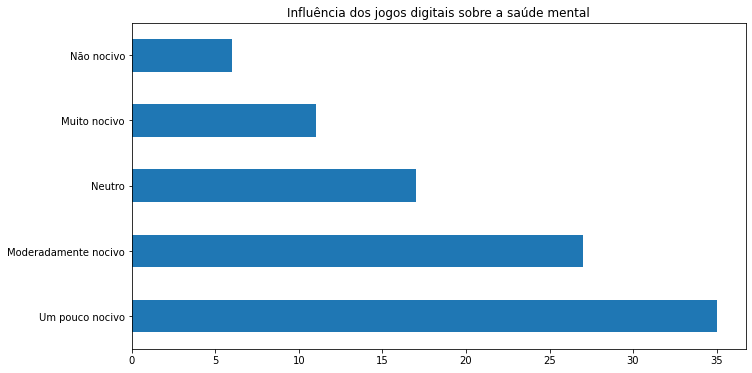

In [10]:
df['quão nocivos a saude mental'].value_counts().plot(kind='barh', figsize= (11,6), title='Influência dos jogos digitais sobre a saúde mental')


In [11]:
# quantos porcento foi alvo de comportamento nocivo?
df['foi alvo de comportamento nocivo'].value_counts()
print(84 * 100 /96)

87.5


In [12]:
# quão afetado pelo comportamento nocivo? utilizando intervalos de confiança

def bootstrap(data, alpha=0.95, n_rep=100):
  print(data)
  theta_hat_error_list = list()
  theta = np.mean(data)
  
  # Resampling
  for i in range(0,n_rep):
    x = resample(data, replace=True)
    theta_hat_error = np.mean(x) - theta
    theta_hat_error_list.append(theta_hat_error)

  # Percentiles
  lower_p = ((1.0-alpha)/2.0) * 100
  upper_p = (alpha+((1.0-alpha)/2.0)) * 100

  # Lower and Upper Bounds
  lower_value = np.percentile(theta_hat_error_list, lower_p)
  upper_value = np.percentile(theta_hat_error_list, upper_p)

  lower_limit = theta+lower_value
  upper_limit = theta+upper_value

  return theta, lower_limit, upper_limit

subset = df['quão afetado pelo comportamento nocivo'].dropna().to_numpy()
subset_float = subset.astype(float)

theta, lower_limit, upper_limit = bootstrap(subset_float)
print(theta, lower_limit, upper_limit)

[4. 2. 3. 4. 1. 3. 4. 5. 1. 3. 2. 2. 2. 3. 1. 3. 3. 3. 2. 1. 2. 4. 3. 3.
 4. 2. 2. 1. 3. 2. 1. 4. 1. 3. 4. 2. 1. 1. 3. 5. 2. 3. 1. 5. 1. 1. 4. 2.
 1. 2. 1. 4. 3. 1. 3. 2. 2. 4. 2. 1. 4. 2. 1. 3. 2. 5. 3. 3. 1. 1. 5. 3.
 3. 1. 4. 1. 2. 5. 1. 1. 1. 4. 3. 2.]
2.488095238095238 2.238095238095238 2.7562499999999996


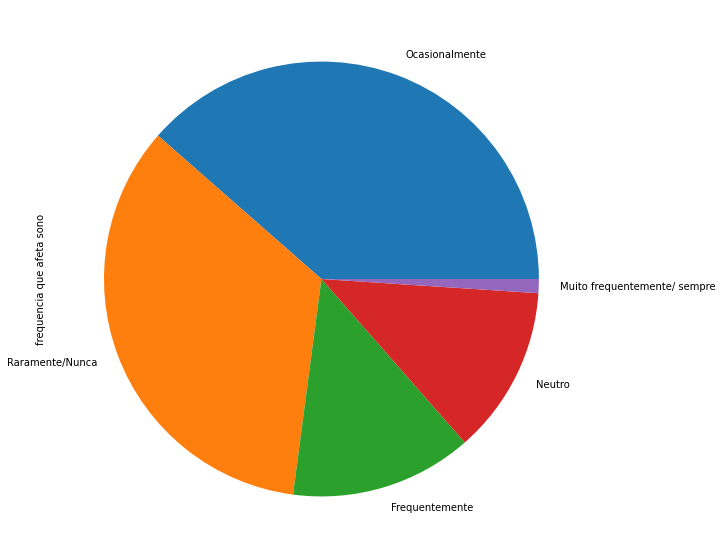

In [15]:
# frequencia que afeta o sono

df['frequencia que afeta sono'].value_counts().plot(kind='pie', figsize= (17,10))

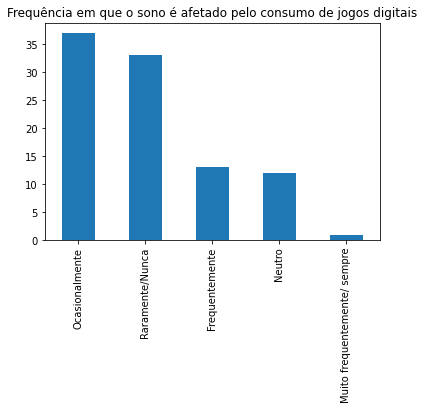

In [32]:

df['frequencia que afeta sono'].value_counts().plot(kind='bar', figsize= (6,4),title='Frequência em que o sono é afetado pelo consumo de jogos digitais')

Conclusões:
- das 114 respostas obtidas no formulario, 96 tem alguma ligação com jogos digitais, sendo 52,6% que jogavam com frequência antes de entrar, mas diminuiram a frequência apos o inicio do curso e 28,9% jogava com frequência antes de entrar no curso e se mantem jogando com frequência após o ingresso, o que implica que uma parte significativa da amostra jogava ou ainda joga jogos digitais.
- Uma grande parcela também concorda que o hábito de jogar influenciou a escolha pelo curso (colocar os dados exatos)
- A quantidade de horas jogadas é bem inferior a quantidade de horas dedicadas a graduação, o que pode mostrar que apesar do habito de jogar os alunos priorizam os estudos
- A maioria (porem nao muito expressiva) acredita que jogar nao atrapalha seu desempenho academico
- com relação ao ambiente dos jogos digitais a maioria considera pouco ou moderamdamente nocivo. A grande maioria dos respondentes (mais de 80 por cento) ja sofreu um comportamento nocivo, mas em média são afetados por esse comportamento em 2.2023809523809526 pontos (sendo o maximo 5), com intervalo de confiança variando entre 2.488095238095238 e 2.6910714285714286. O que significa que nao sao muito afetados pelos comportamentos nocivos
- A maioria dos alunos nao considera que seu sono é muito afetado pelos jogos.
- Podemos ver que parece haver uma relação relativamente saudavel dos alunos com os jogos digitais, apesar de ser frequente sofrer comportamentos nocivos no ambiente, a maioria nao se sente muito afetado com isso e também concilia bem os estudos com os jogos.
- existe uma relação entre jogar com frequencia e escolher o curso? tentar fazer essa correlação
